<a href="https://colab.research.google.com/github/groupe11ML/groupe11ML/blob/main/TP2_groupe11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GROUPE 11 
#KEUFACK DONGMO BELVIANE BERENICE 19Y204
#LEUKAM FERMAT 19Y208
#LONTSI TIDOH MOREL 19Y082
#TCHAMEDEU TCHAMEDEU JORDAN STEVE 19Y458

#1-GÉNÉRER DES JEUX DE DONNÉES EN PYTHON

Le code Python suivant est un simple
exemple dans lequel nous créons artificielle
données météorologiques pour certaines villes allemandes. Nous
utilisez Pandas et Numpy pour créer les données :

In [1]:
import numpy as np
import pandas as pd
cities = ['Berlin', 'Frankfurt', 'Hamburg',
'Nuremberg', 'Munich', 'Stuttgart',
'Hanover', 'Saarbruecken', 'Cologne',
'Constance', 'Freiburg', 'Karlsruhe']
n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),
'Humidity': np.random.normal(78, 2.5, n),
'Wind': np.random.normal(15, 4, n)
}
df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidity,Wind
0,23.282588,75.565357,15.276770
1,21.459463,80.962810,15.169495
2,27.688545,78.738044,20.186322
3,25.746396,83.357103,8.079107
4,21.011515,85.356523,14.781244
5,15.751503,76.695519,10.727203
6,26.958282,77.439982,15.614042
7,22.393695,77.155105,13.913254
8,25.076616,78.371861,17.063256
9,25.903113,76.155666,19.726919


UN AUTRE EXEMPLE
Nous allons créer des données artificielles pour quatre types de fleurs inexistants :
• Flos Pythonem
• Flos Java
• Flos Margarita
• Flos artificialis

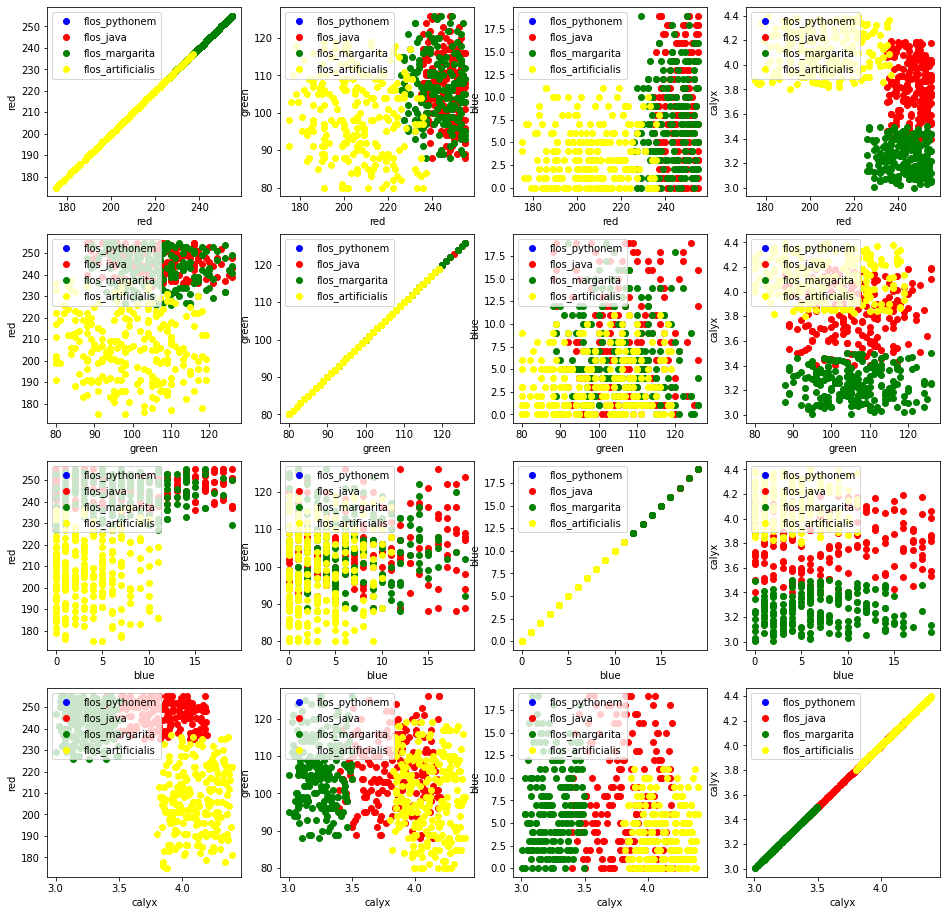

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
  return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
  res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
  return res.rvs(num)
def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
  res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
  return res.rvs(num).astype(np.uint8)
# number of items for each flower class:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}

# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data
# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data
# flos Java:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data
# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
num=number_of_items)

blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data
data = np.concatenate((flowers["flos_pythonem"],
flowers["flos_java"],
flowers["flos_margarita"],
flowers["flos_artificialis"]
), axis=0)
# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
  num = number_of_items_per_class[i-1]
  beg = previous_end
  target[beg: beg + num] += i
  previous_end = beg + num
conc_data = np.concatenate((data, target.reshape(target.shape[0],
1)),axis=1)
np.savetxt("strange_flowers.txt", conc_data, fmt="%2.2f",)
import matplotlib.pyplot as plt
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']
for x in range(n):
  for y in range(n):
    xname = feature_names[x]
    yname = feature_names[y]
    for color_ind in range(len(target_names)):
      ax[x, y].scatter(data[target==color_ind, x],data[target==color_ind, y],label=target_names[color_ind],c=colors[color_ind])
    ax[x, y].set_xlabel(xname)
    ax[x, y].set_ylabel(yname)
    ax[x, y].legend(loc='upper left')
plt.show()

#2-GÉNÉRER DES DONNÉES SYNTHÉTIQUES AVEC SCIKIT-LEARN

Il est beaucoup plus facile d'utiliser les possibilités de Scikit-Learn pour créer des données synthétiques. Dans l'exemple suivant nous
utilisez la fonction make_blobs de sklearn.datasets pour créer des 'blob' comme des distributions de données :

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
data, labels = make_blobs(n_samples=1000,
#centers=n_classes,
centers=np.array([[2, 3], [4, 5], [7,
9]]),
random_state=1)
labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

un exemple extrêmement simple de la combinaison de remodelage et de concaténation. dans le code suivant :

In [12]:
import numpy as np
a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)
x = np.concatenate( (a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

3-LECTURE DES DONNEES ET
RECONVERSION EN 'DONNÉES'
ET 'ÉTIQUETTES'

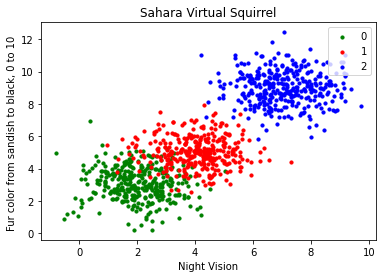

In [14]:
file_data = np.loadtxt("squirrels.txt")
data = file_data[:,:-1]
labels = file_data[:,2:]
labels = labels.reshape((labels.shape[0]))
import matplotlib.pyplot as plt
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3
fig, ax = plt.subplots()
for n_class in range(0, n_classes):
  ax.scatter(data[labels==n_class, 0], data[labels==n_class,
  1],
  c=colours[n_class], s=10, label=str(n_class))
ax.set(xlabel='Night Vision',
ylabel='Fur color from sandish to black, 0 to 10 ',
title='Sahara Virtual Squirrel')
ax.legend(loc='upper right')



Nous entrainerons nos données artificielles dans le code suivant :

In [15]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data,
labels,
train_size=0.8,
test_size=0.2,
random_state=42 # garantees same output for every run
)
train_data, test_data, train_labels, test_labels = data_sets
# import model
from sklearn.neighbors import KNeighborsClassifier
# create classifier
knn = KNeighborsClassifier(n_neighbors=8)
# train
knn.fit(train_data, train_labels)
# test on test data:
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

calcul de la précision

In [17]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.97


#4-AUTRE DISTRIBUTIONS INTÉRESSANTES

In [4]:
import numpy as np
import sklearn.datasets as ds
data, labels = ds.make_moons(n_samples=150,
shuffle=True,
noise=0.19,
random_state=None)
data += np.array(-np.ndarray.min(data[:,0]),
-np.ndarray.min(data[:,1]))
np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])


(0.0, 0.45733266007757356)

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'Moons')]

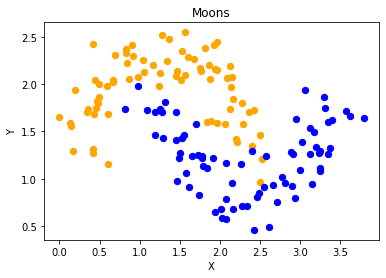

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],c='blue', s=40, label='blues')
ax.set(xlabel='X',ylabel='Y',title='Moons')
#ax.legend(loc='upper right');

Nous voulons mettre à l'échelle des valeurs qui sont dans une plage [min, max] dans une plage [a, b] .
f(x) =(b − a)*(x − min)/(max − min) + a

Nous utilisons maintenant cette formule pour transformer les coordonnées X et Y des données en d'autres plages :


In [8]:
min_x_new, max_x_new = 33, 88
min_y_new, max_y_new = 12, 20
data, labels = ds.make_moons(n_samples=100,shuffle=True,noise=0.05,random_state=None)
min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
#data -= np.array([min_x, 0])
#data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), 1])
#data += np.array([min_x_new, 0])
#data -= np.array([0, min_y])
#data *= np.array([1, (max_y_new - min_y_new) / (max_y - min_y)])
#data += np.array([0, min_y_new])
data -= np.array([min_x, min_y])
data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new - min_y_new) / (max_y - min_y)])
data += np.array([min_x_new, min_y_new])
#np.ndarray.min(data[:,0]), np.ndarray.max(data[:,0])
data[:6]


array([[64.97400945, 17.99983745],
       [58.47938928, 19.1149874 ],
       [57.89945196, 14.27810706],
       [69.85679115, 12.4015929 ],
       [70.20898003, 15.67377644],
       [74.5960934 , 12.97863957]])

In [10]:
def scale_data(data, new_limits, inplace=False ):
  if not inplace:
    data = data.copy()
  min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
  max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
  min_x_new, max_x_new = new_limits[0]
  min_y_new, max_y_new = new_limits[1]
  data -= np.array([min_x, min_y])
  data *= np.array([(max_x_new - min_x_new) / (max_x - min_x),(max_y_new - min_y_new) / (max_y - min_y)])
  data += np.array([min_x_new, min_y_new])
  if inplace:
    return None
  else:
    return data
data, labels = ds.make_moons(n_samples=100,shuffle=True,noise=0.05,random_state=None)
scale_data(data, [(1, 4), (3, 8)], inplace=True)
data[:10]


array([[1.95856578, 7.59337714],
       [1.        , 5.4179682 ],
       [1.02550692, 4.90709584],
       [2.66828992, 7.26699547],
       [1.2825602 , 6.31633009],
       [1.4809545 , 7.52017059],
       [2.32935289, 7.59799644],
       [2.74216977, 3.        ],
       [3.58010085, 3.89523935],
       [3.33801361, 3.25333277]])

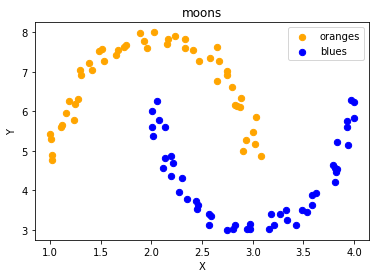

In [11]:
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
c='blue', s=40, label='blues')
ax.set(xlabel='X',
ylabel='Y',
title='moons')
ax.legend(loc='upper right');


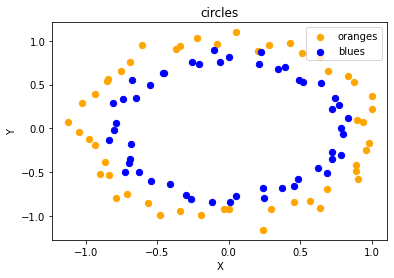

In [12]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100,shuffle=True,noise=0.05,random_state=None)
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],c='blue', s=40, label='blues')
ax.set(xlabel='X',ylabel='Y',title='circles')
ax.legend(loc='upper right')

Automatically created module for IPython interactive environment


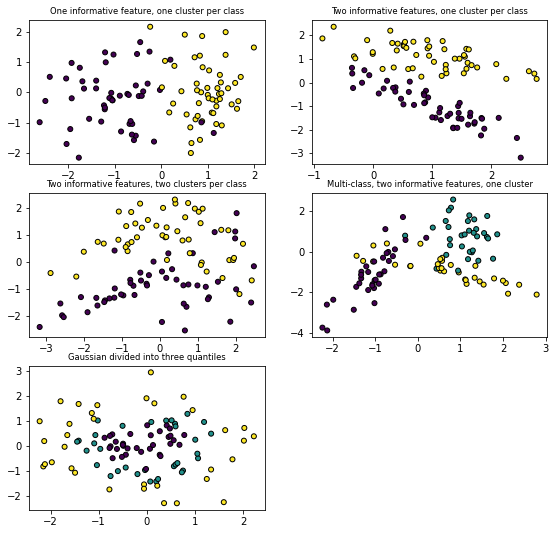

In [14]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(323)
plt.title("Two informative features, two clusters per class",fontsize='small')
X2, Y2 = make_classification(n_features=2,n_redundant=0,n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,s=25, edgecolor='k')
plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",fontsize='small')
X1, Y1 = make_classification(n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(325)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.show()



#EXERCISES

EXERCICE 1
Créeons deux ensembles de tests séparables avec un perceptron sans nœud de biais.

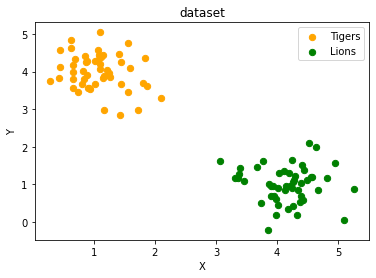

In [15]:
data, labels = make_blobs(n_samples=100,cluster_std = 0.5,centers=[[1, 4] ,[4, 1]],random_state=1)
fig, ax = plt.subplots()
colours = ["orange", "green"]
label_name = ["Tigers", "Lions"]
for label in range(0, 2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1],c=colours[label], s=40, label=label_name[label])

ax.set(xlabel='X',ylabel='Y',title='dataset')
ax.legend(loc='upper right')

EXERCICE 2:
Créeons deux jeux de tests qui ne sont pas séparables avec une ligne de séparation passant par l'origine

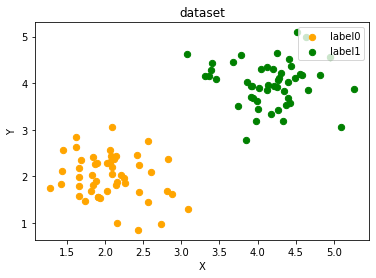

In [18]:
data, labels = make_blobs(n_samples=100,
cluster_std = 0.5,
centers=[[2, 2] ,[4, 4]],
random_state=1)
fig, ax = plt.subplots()
colours = ["orange", "green"]
label_name = ["label0", "label1"]
for label in range(0, 2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1],c=colours[label], s=40, label=label_name[label])
ax.set(xlabel='X',ylabel='Y',title='dataset')
ax.legend(loc='upper right')


EXERCICE 3:Créeons un ensemble de données avec cinq classes "Tiger", "Lion", "Penguin", "Dolphin" et "Python"

[2 4 4 3 4 4 3 3 2 4 4 2 4 4 3 4 2 4 4 4 4 2 2 4 4 3 2 2 3 2 2 3 2 3 3 3 3
 3 4 3 3 2 3 3 3 2 2 2 2 3 4 4 4 2 4 3 3 2 2 3 4 4 3 3 4 2 4 2 4 3 3 4 2 2
 3 4 4 2 3 2 3 3 4 2 2 2 2 3 2 4 2 2 3 3 4 4 2 2 4 3]


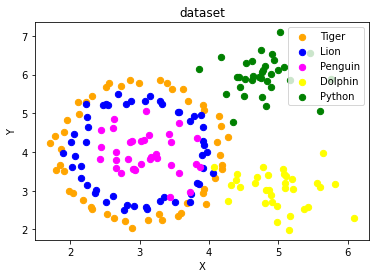

In [20]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100,
shuffle=True,
noise=0.05,
random_state=42)
centers = [[3, 4], [5, 3], [4.5, 6]]
data2, labels2 = make_blobs(n_samples=100,
cluster_std = 0.5,
centers=centers,
random_state=1)
for i in range(len(centers)-1, -1, -1):
  labels2[labels2==0+i] = i+2
print(labels2)
labels = np.concatenate([labels, labels2])
data = data * [1.2, 1.8] + [3, 4]
data = np.concatenate([data, data2], axis=0)
fig, ax = plt.subplots()
colours = ["orange", "blue", "magenta", "yellow", "green"]
label_name = ["Tiger", "Lion", "Penguin", "Dolphin", "Python"]
for label in range(0, len(centers)+2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1],c=colours[label], s=40, label=label_name[label])
ax.set(xlabel='X',ylabel='Y',title='dataset')
ax.legend(loc='upper right')
